In [76]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [2]:
csv_file = '/Users/bradley.webb/Downloads/New_Query_2020_05_11.csv'

In [3]:
df = pd.read_csv(csv_file)

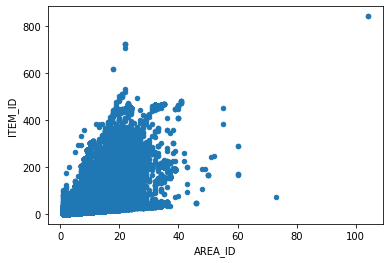

In [5]:
ax = df.plot.scatter(x="AREA_ID", y="ITEM_ID")

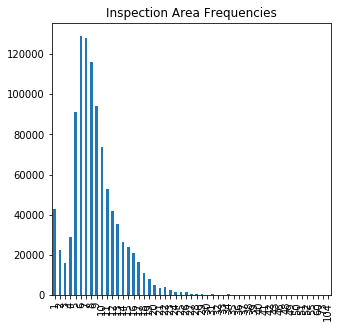

In [46]:
# ax = df[['AREA_ID', 'ITEM_ID']].plot.hist(subplots=True, alpha=.5)
# df['AREA_ID'].value_counts().sort_index() # or sort_values()
ax = df['AREA_ID'].value_counts().sort_index().plot.bar(title='Inspection Area Frequencies', figsize=(5,5))

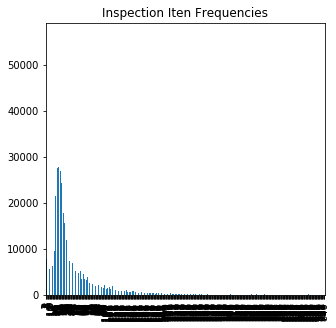

In [47]:
ax = df['ITEM_ID'].value_counts().sort_index().plot.bar(title='Inspection Iten Frequencies', figsize=(5,5))
# ax = df['ITEM_ID'].value_counts().plot.hist(title='Inspection Item Frequencies')

In [18]:
df[['AREA_ID', 'ITEM_ID']].describe()

,AREA_ID,ITEM_ID
count,1000000.000000,1000000.000000
mean,8.607036,40.817848
std,4.375745,41.428693
min,1.000000,1.000000
25%,6.000000,19.000000
50%,8.000000,26.000000
75%,11.000000,46.000000
max,104.000000,840.000000


In [59]:
# df[['AREA_ID', 'ITEM_ID']].group_by(['AREA_ID', 'ITEM_ID']).count()
# df['AREA_ID'].value_counts()
# df[['AREA_ID', 'ITEM_ID']].apply(pd.Series.value_counts)

df.groupby(['AREA_ID', 'ITEM_ID']).size()

AREA_ID  ITEM_ID
1        1          19983
         2           3651
         3           2609
         4           4057
         5           1826
                    ...  
60       168            1
         170            2
         291            2
73       74             1
104      840            2
Length: 5784, dtype: int64

In [95]:
# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

# x = grouped.values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled

# grouped.values

grouped.index.get_level_values(1)[:5000]

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            55, 56, 61, 62, 63, 65, 66, 67, 68, 69],
           dtype='int64', name='ITEM_ID', length=5000)

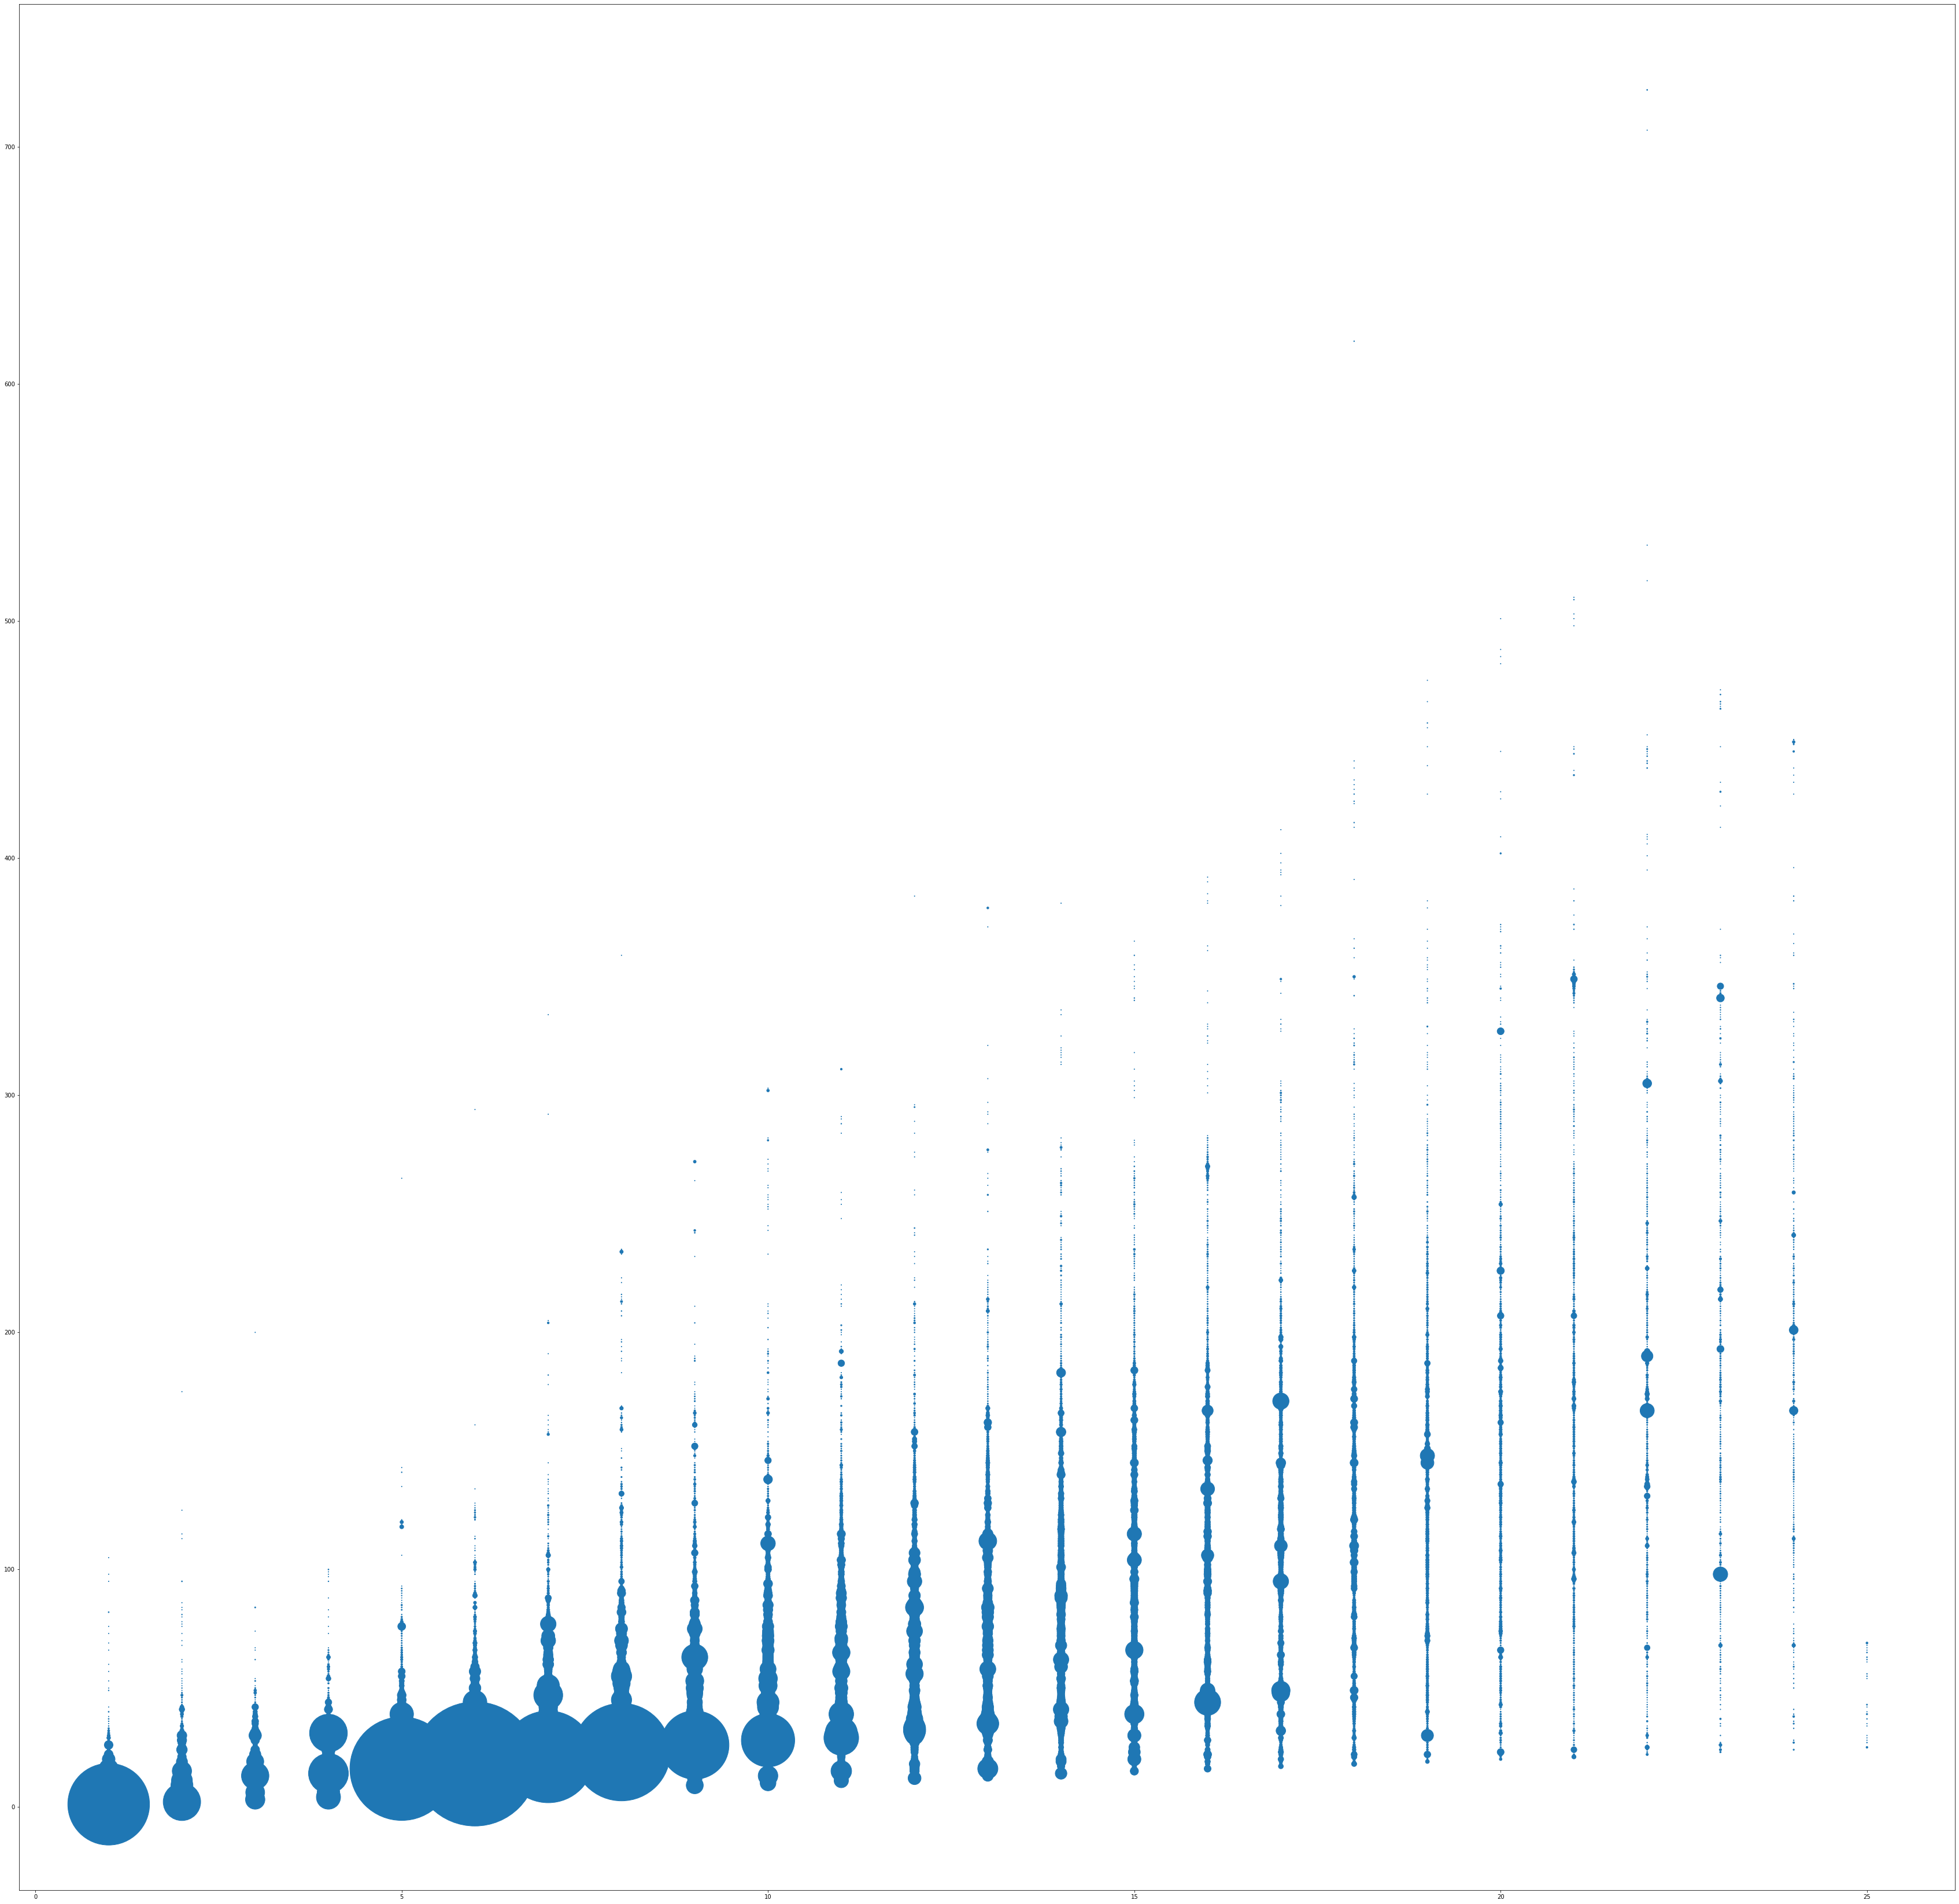

In [96]:
# plt.scatter(x=grouped.index.get_level_values(0), y=grouped.index.get_level_values(1), s=[20*4**n for n in grouped.values])
# plt.show()

grouped = df.groupby(['AREA_ID', 'ITEM_ID']).size()

plt.figure(figsize=(60,60))
plt.scatter(x=grouped.index.get_level_values(0), y=grouped.index.get_level_values(1), s=[n for n in grouped.values])
# grid(color='r', linestyle='-', linewidth=2)
plt.grid(True, which='minor', axis='y')
plt.show()

In [97]:
grouped

AREA_ID  ITEM_ID
1        1          19983
         2           3651
         3           2609
         4           4057
         5           1826
                    ...  
60       168            1
         170            2
         291            2
73       74             1
104      840            2
Length: 5784, dtype: int64

In [98]:
pd.options.display.max_rows

60

In [99]:
grouped.shape

(5784,)

In [127]:
sample_size = 5

In [132]:
grouped.sort_values(ascending=False)[1:sample_size]

AREA_ID  ITEM_ID
5        16         32095
8        23         28504
7        21         25265
1        1          19983
dtype: int64

In [129]:
grouped.sort_values(ascending=False).values[:sample_size].sum()

152011

In [130]:
grouped.sort_values(ascending=False).values[:sample_size].sum()/grouped.values.sum()

0.152011

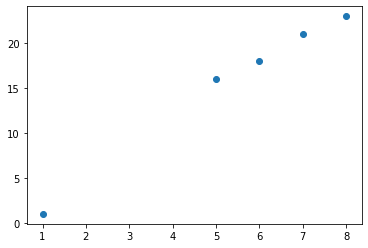

In [134]:
plt.scatter(x=grouped.sort_values(ascending=False).index.get_level_values(0)[:sample_size], y=grouped.sort_values(ascending=False).index.get_level_values(1)[:sample_size])

In [135]:
# dftest.groupby(['A','Amt']).size().rename('count').reset_index()

# , s=[n for n in grouped.sort_values(ascending=False).values[:sample_size]]
df2 = df.groupby(['AREA_ID', 'ITEM_ID']).size().rename('count').reset_index()
df2

,AREA_ID,ITEM_ID,count
0,1,1,19983
1,1,2,3651
2,1,3,2609
3,1,4,4057
4,1,5,1826
...,...,...,...
5779,60,168,1
5780,60,170,2
5781,60,291,2
5782,73,74,1


In [176]:
# x = grouped.values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_scaled

# frames = [df1, df2, df3]
# result = pd.concat(frames)

# grouped.values

x = df2[['count']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 50))
x_scaled = min_max_scaler.fit_transform(x)
df3 = pd.DataFrame(x_scaled)
df3 = pd.concat([df2[['AREA_ID', 'ITEM_ID']], df3], axis=1)

(0, 50)

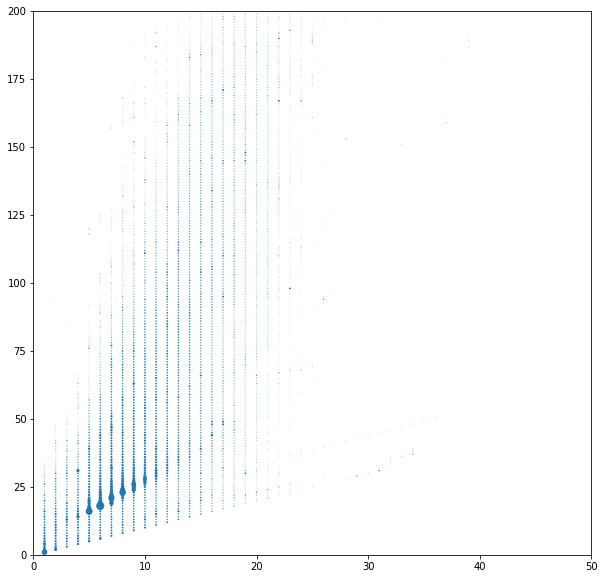

In [178]:
# df3['AREA_ID']

plt.figure(figsize=(10,10))
plt.scatter(x=df3['AREA_ID'].values, y=df3['ITEM_ID'].values, s=df3[0].values)
plt.ylim(0,200)
plt.xlim(0,50)